In [3]:
import numpy as np
import pandas as pd

In [4]:
weather = pd.read_csv("data/t_Kyiv.csv", index_col="DATE")

In [5]:
weather

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1970-01-01,UPM00033345,"KIEV, UP",0.13,NaN,-1.0,11.0,-9.0
1970-01-02,UPM00033345,"KIEV, UP",0.37,NaN,28.0,34.0,11.0
1970-01-03,UPM00033345,"KIEV, UP",0.27,NaN,22.0,32.0,16.0
1970-01-04,UPM00033345,"KIEV, UP",0.00,NaN,22.0,31.0,15.0
1970-01-05,UPM00033345,"KIEV, UP",0.00,NaN,28.0,37.0,20.0
...,...,...,...,...,...,...,...
2025-03-12,UPM00033345,"KIEV, UP",NaN,NaN,51.0,56.0,45.0
2025-03-13,UPM00033345,"KIEV, UP",NaN,NaN,50.0,59.0,40.0
2025-03-14,UPM00033345,"KIEV, UP",NaN,NaN,54.0,60.0,NaN


In [6]:
# відсоток пустих вимірювань в рядках
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.270187
SNWD       0.825614
TAVG       0.001460
TMAX       0.100836
TMIN       0.203081
dtype: float64

In [7]:
# з всіх вимірювань вибираємо лише максимальну, мінімальну та середню температури
core_weather = weather[["TAVG", "TMAX", "TMIN"]].copy()

In [8]:
core_weather

,TAVG,TMAX,TMIN
DATE,,,
1970-01-01,-1.0,11.0,-9.0
1970-01-02,28.0,34.0,11.0
1970-01-03,22.0,32.0,16.0
1970-01-04,22.0,31.0,15.0
1970-01-05,28.0,37.0,20.0
...,...,...,...
2025-03-12,51.0,56.0,45.0
2025-03-13,50.0,59.0,40.0
2025-03-14,54.0,60.0,NaN


In [9]:
# пусті вимірювання 
core_weather[pd.isnull(core_weather["TAVG"])]

,TAVG,TMAX,TMIN
DATE,,,
2006-01-06,NaN,NaN,NaN
2006-01-07,NaN,NaN,NaN
2006-02-25,NaN,NaN,NaN
2006-02-27,NaN,NaN,NaN
2006-03-08,NaN,NaN,NaN
2006-11-05,NaN,NaN,NaN
2007-01-28,NaN,NaN,NaN
2007-02-18,NaN,NaN,NaN
2007-09-07,NaN,NaN,NaN


In [10]:
# тут використовується форвард філ, тобто дублювання даних з попереднього рядка
core_weather = core_weather.fillna(method="ffill")

In [11]:
core_weather.apply(pd.isnull).sum()/weather.shape[0]

TAVG    0.0
TMAX    0.0
TMIN    0.0
dtype: float64

In [12]:
# Далі будемо перевіряти чи всі дані мають правильний тип даних для машиного навчання 

In [13]:
core_weather.index
# тип індекса - object, що означає що це просто рядок, але для ML треба це все перетворити в тип datetime

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10', '2025-03-11',
       '2025-03-12', '2025-03-13', '2025-03-14', '2025-03-15', '2025-03-16'],
      dtype='object', name='DATE', length=19864)

In [14]:
core_weather.index = pd.to_datetime(weather.index)

In [15]:
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2025-03-07', '2025-03-08', '2025-03-09', '2025-03-10',
               '2025-03-11', '2025-03-12', '2025-03-13', '2025-03-14',
               '2025-03-15', '2025-03-16'],
              dtype='datetime64[ns]', name='DATE', length=19864, freq=None)

In [16]:
# перевіряємо на помилки в вимірюваннях 
core_weather.apply(lambda x: (x == 9999).sum())

#як ми бачимо в датасеті немає помилок в вимірюваннях

TAVG    0
TMAX    0
TMIN    0
dtype: int64

<AxesSubplot: xlabel='DATE'>

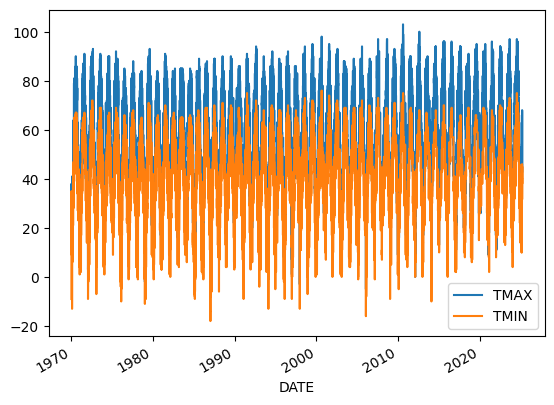

In [17]:
#З цього блоку коду починається аналіз даних
core_weather[["TMAX", "TMIN"]].plot()


<AxesSubplot: xlabel='DATE'>

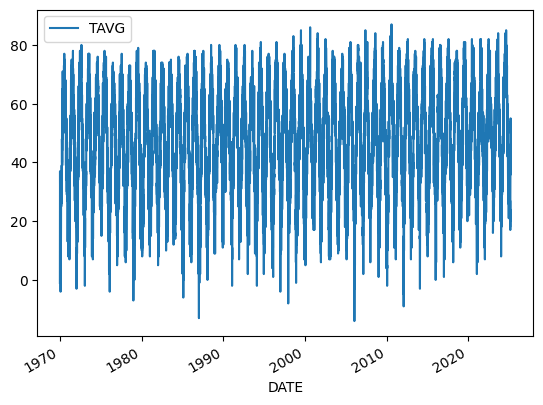

In [18]:
core_weather[["TAVG"]].plot()

In [ ]:
#Як ми бачимо з графіків, в нас немає ніяких відсутніх даних, тому можемо залишити так, як є

#З наступного блоку коду почнеться тренування моделі 

In [ ]:
# Спершу треба зрозуміти що ми хочемо передбачити. В даному випадку ми будемо старатись передбачити 
# максимальну температуру наступного дня використовуючи історичні дані.

# Створимо для цього нову "таргетну" колонку, 
#
# Ця колонка - це буде дублікат колонки TMAX, сдвинутий вгору

In [19]:
core_weather["target1"] = core_weather.shift(-1)["TMAX"]

core_weather

,TAVG,TMAX,TMIN,target1
DATE,,,,
1970-01-01,-1.0,11.0,-9.0,34.0
1970-01-02,28.0,34.0,11.0,32.0
1970-01-03,22.0,32.0,16.0,31.0
1970-01-04,22.0,31.0,15.0,37.0
1970-01-05,28.0,37.0,20.0,38.0
...,...,...,...,...
2025-03-12,51.0,56.0,45.0,59.0
2025-03-13,50.0,59.0,40.0,60.0
2025-03-14,54.0,60.0,40.0,53.0


In [24]:
# як ми бачимо в колонкі target1 кожний рядок певного дня вказує на завтрашню погоду, 
# тобто рядок дати першого січня 1970 вказує на погоду другого січня 1970. І ці завтрашні температури 
# в рядках є цілями, таргетами.
# 
# Можна помітити, що в останньому рядку Nan, тому його можна видалити

core_weather = core_weather.iloc[:-1, :].copy()
core_weather

,TAVG,TMAX,TMIN,target1
DATE,,,,
1970-01-01,-1.0,11.0,-9.0,34.0
1970-01-02,28.0,34.0,11.0,32.0
1970-01-03,22.0,32.0,16.0,31.0
1970-01-04,22.0,31.0,15.0,37.0
1970-01-05,28.0,37.0,20.0,38.0
...,...,...,...,...
2025-03-11,52.0,67.0,40.0,56.0
2025-03-12,51.0,56.0,45.0,59.0
2025-03-13,50.0,59.0,40.0,60.0


In [26]:
# Нарешті можна приступити до машинного навчання

from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1) # альфа - це коефіцієнт, який контролює наскільки великий коефіцієнт регресивної моделі аналізує,
                      # чим більше Penalty, тим біьлше запобігає overfitting моделі (див. в інтернеті)

In [27]:
predictors = ["TAVG", "TMIN", "TMAX"] # Які колонки слугують для передбачення

In [28]:
train = core_weather[:"2022-12-31"] # на цьому будемо тренувати тестову модель
test = core_weather["2023-01-01":] # а на цьому будемо перевіряти передбачення

In [30]:
# Тут ми "засовуємо" в модель передбачення наші дані (train[predictors])
# та до чого треба прямувати при передбаченні (train["target1"])
reg.fit(train[predictors], train["target1"]) 

Ridge(alpha=0.1)

In [32]:
predictions = reg.predict(test[predictors]) # Генеруємо передбачення

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test["target1"], predictions) # вираховує середнью абсолютну похибку

4.092632988171302

In [ ]:
# як ми бачимо середня похибка поміж передбачень сягає приблизно 4,
# що є +- нормально, але можна покращити точність.